In [ ]:
!pip install pandas
!pip install matplotlib
!pip install vectorbt
!pip install yfinance
!pip install pandas_ta
!pip install numpy
!pip install python-binance
!pip install pyfolio-reloaded
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 3.1 MB/s eta 0:00:00


In [ ]:
from binance.client import Client
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta
import vectorbt as vbt
import yfinance as yf
import pytz

# this google Colab will have 3 section
1. backtest bnb 1 Year
2. parameter optimization for find the best ema for trading 1H in BNB
3. use python binance api for create realtime trading

# this is experiment of my knowledge ^3^

## 1. **I will backtest BNB 1 Y in bear market 2022**
## and we will see  we will have more potential more than holding with out action anything

In [ ]:
df = yf.download(tickers='BNB-USD',period='12mo',interval='1h')
df.head()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close  \
Datetime                                                              
2022-01-10 22:00:00  423.449249  424.685944  422.898804  423.191895   
2022-01-10 23:00:00  423.176666  425.168182  422.731873  424.884155   
2022-01-11 00:00:00  424.891205  425.261688  422.480682  422.677246   
2022-01-11 01:00:00  422.620972  425.203278  422.000916  425.182617   
2022-01-11 02:00:00  425.208893  429.941772  425.208893  429.411041   

                      Adj Close    Volume  
Datetime                                   
2022-01-10 22:00:00  423.191895         0  
2022-01-10 23:00:00  424.884155         0  
2022-01-11 00:00:00  422.677246         0  
2022-01-11 01:00:00  425.182617   4901120  
2022-01-11 02:00:00  429.411041  31919616

In [ ]:
df.ta.macd(append=True)


MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9
Datetime                                                       
2022-01-10 22:00:00           NaN            NaN            NaN
2022-01-10 23:00:00           NaN            NaN            NaN
2022-01-11 00:00:00           NaN            NaN            NaN
2022-01-11 01:00:00           NaN            NaN            NaN
2022-01-11 02:00:00           NaN            NaN            NaN
...                           ...            ...            ...
2023-01-10 18:00:00      0.153523       0.029185       0.124338
2023-01-10 19:00:00      0.218947       0.075687       0.143260
2023-01-10 20:00:00      0.425808       0.226038       0.199770
2023-01-10 21:00:00      0.553508       0.282991       0.270517
2023-01-10 22:00:00      0.594667       0.259319       0.335347

[8761 rows x 3 columns]

In [ ]:
df

 # MACDh is histogram
 # MACDs is signal line 
 # MACD is 12,26  line

Open        High         Low       Close  \
Datetime                                                              
2022-01-10 18:00:00  417.244568  420.433380  416.999603  420.255646   
2022-01-10 19:00:00  420.352478  422.997131  418.722778  420.411499   
2022-01-10 20:00:00  419.965668  423.444977  418.907562  423.444977   
2022-01-10 21:00:00  423.553009  424.727600  422.731079  423.453308   
2022-01-10 22:00:00  423.449249  424.685944  422.898804  423.191895   
...                         ...         ...         ...         ...   
2023-01-10 14:00:00  274.574951  276.011322  274.438263  275.352356   
2023-01-10 15:00:00  275.286560  276.299744  275.044098  275.896973   
2023-01-10 16:00:00  275.857208  275.860229  274.729797  275.058197   
2023-01-10 17:00:00  275.024689  275.207306  274.826874  275.207306   
2023-01-10 18:00:00  275.225281  275.598358  275.040710  275.598358   

                      Adj Close    Volume  MACD_12_26_9  MACDh_12_26_9  \
Datetime                                                                 
2022-01-10 18:00:00  420.255646         0           NaN            NaN   
2022-01-10 19:00:00  420.411499   2980608           NaN            NaN   
2022-01-10 20:00:00  423.444977  21713152           NaN            NaN   
2022-01-10 21:00:00  423.453308  13190656           NaN            NaN   
2022-01-10 22:00:00  423.191895         0           NaN            NaN   
...                         ...       ...           ...            ...   
2023-01-10 14:00:00  275.352356         0      0.044306      -0.085687   
2023-01-10 15:00:00  275.896973   6415552      0.113699      -0.013035   
2023-01-10 16:00:00  275.058197   1435968      0.099860      -0.021499   
2023-01-10 17:00:00  275.207306    586656      0.099774      -0.017268   
2023-01-10 18:00:00  275.598358   1149856      0.129765       0.010178   

                     MACDs_12_26_9  
Datetime                            
2022-01-10 18:00:00            NaN  
2022-01-10 19:00:00            NaN  
2022-01-10 20:00:00            NaN  
2022-01-10 21:00:00            NaN  
2022-01-10 22:00:00            NaN  
...                            ...  
2023-01-10 14:00:00       0.129993  
2023-01-10 15:00:00       0.126734  
2023-01-10 16:00:00       0.121359  
2023-01-10 17:00:00       0.117042  
2023-01-10 18:00:00       0.119587  

[8761 rows x 9 columns]

this section i cluster the type of macd  to 4 type

1.   histogram are morethan 0 and macd line are more than 0 

2.   histogram are lessthan 0 and macd line are more than 0 

3.   histogram are lessthan 0 and macd line are less than 0 

4.   histogram are morethan 0 and macd line are less than 0 





In [ ]:
df['s+,h+'] = (df['MACD_12_26_9']>0)& (df['MACDh_12_26_9']>0)
df['s+,h-'] = (df['MACD_12_26_9']>0)& (df['MACDh_12_26_9']<0)
df['s-,h-'] = (df['MACD_12_26_9']<0)& (df['MACDh_12_26_9']<0)
df['s-,h+'] = (df['MACD_12_26_9']>0)& (df['MACDh_12_26_9']>0)
df

Open        High         Low       Close  \
Datetime                                                              
2022-01-10 18:00:00  417.244568  420.433380  416.999603  420.255646   
2022-01-10 19:00:00  420.352478  422.997131  418.722778  420.411499   
2022-01-10 20:00:00  419.965668  423.444977  418.907562  423.444977   
2022-01-10 21:00:00  423.553009  424.727600  422.731079  423.453308   
2022-01-10 22:00:00  423.449249  424.685944  422.898804  423.191895   
...                         ...         ...         ...         ...   
2023-01-10 14:00:00  274.574951  276.011322  274.438263  275.352356   
2023-01-10 15:00:00  275.286560  276.299744  275.044098  275.896973   
2023-01-10 16:00:00  275.857208  275.860229  274.729797  275.058197   
2023-01-10 17:00:00  275.024689  275.207306  274.826874  275.207306   
2023-01-10 18:00:00  275.225281  275.598358  275.040710  275.598358   

                      Adj Close    Volume  MACD_12_26_9  MACDh_12_26_9  \
Datetime                                                                 
2022-01-10 18:00:00  420.255646         0           NaN            NaN   
2022-01-10 19:00:00  420.411499   2980608           NaN            NaN   
2022-01-10 20:00:00  423.444977  21713152           NaN            NaN   
2022-01-10 21:00:00  423.453308  13190656           NaN            NaN   
2022-01-10 22:00:00  423.191895         0           NaN            NaN   
...                         ...       ...           ...            ...   
2023-01-10 14:00:00  275.352356         0      0.044306      -0.085687   
2023-01-10 15:00:00  275.896973   6415552      0.113699      -0.013035   
2023-01-10 16:00:00  275.058197   1435968      0.099860      -0.021499   
2023-01-10 17:00:00  275.207306    586656      0.099774      -0.017268   
2023-01-10 18:00:00  275.598358   1149856      0.129765       0.010178   

                     MACDs_12_26_9  s+,h+  s+,h-  s-,h-  s-,h+  
Datetime                                                        
2022-01-10 18:00:00            NaN  False  False  False  False  
2022-01-10 19:00:00            NaN  False  False  False  False  
2022-01-10 20:00:00            NaN  False  False  False  False  
2022-01-10 21:00:00            NaN  False  False  False  False  
2022-01-10 22:00:00            NaN  False  False  False  False  
...                            ...    ...    ...    ...    ...  
2023-01-10 14:00:00       0.129993  False   True  False  False  
2023-01-10 15:00:00       0.126734  False   True  False  False  
2023-01-10 16:00:00       0.121359  False   True  False  False  
2023-01-10 17:00:00       0.117042  False   True  False  False  
2023-01-10 18:00:00       0.119587   True  False  False   True  

[8761 rows x 13 columns]

In [ ]:
df.loc[(df['MACD_12_26_9']>0)& (df['MACDh_12_26_9']>0), 'condition']='s+,h+'
df.loc[(df['MACD_12_26_9']>0)& (df['MACDh_12_26_9']<0), 'condition']='s+,h-'
df.loc[(df['MACD_12_26_9']<0)& (df['MACDh_12_26_9']<0), 'condition']='s-,h-'
df.loc[(df['MACD_12_26_9']<0)& (df['MACDh_12_26_9']>0), 'condition']='s-,h+'


In [ ]:
df.iloc[:,-8:]

MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9  s+,h+  s+,h-  \
Datetime                                                                        
2022-01-10 18:00:00           NaN            NaN            NaN  False  False   
2022-01-10 19:00:00           NaN            NaN            NaN  False  False   
2022-01-10 20:00:00           NaN            NaN            NaN  False  False   
2022-01-10 21:00:00           NaN            NaN            NaN  False  False   
2022-01-10 22:00:00           NaN            NaN            NaN  False  False   
...                           ...            ...            ...    ...    ...   
2023-01-10 14:00:00      0.044306      -0.085687       0.129993  False   True   
2023-01-10 15:00:00      0.113699      -0.013035       0.126734  False   True   
2023-01-10 16:00:00      0.099860      -0.021499       0.121359  False   True   
2023-01-10 17:00:00      0.099774      -0.017268       0.117042  False   True   
2023-01-10 18:00:00      0.129765       0.010178       0.119587   True  False   

                     s-,h-  s-,h+ condition  
Datetime                                     
2022-01-10 18:00:00  False  False       NaN  
2022-01-10 19:00:00  False  False       NaN  
2022-01-10 20:00:00  False  False       NaN  
2022-01-10 21:00:00  False  False       NaN  
2022-01-10 22:00:00  False  False       NaN  
...                    ...    ...       ...  
2023-01-10 14:00:00  False  False     s+,h-  
2023-01-10 15:00:00  False  False     s+,h-  
2023-01-10 16:00:00  False  False     s+,h-  
2023-01-10 17:00:00  False  False     s+,h-  
2023-01-10 18:00:00  False   True     s+,h+  

[8761 rows x 8 columns]

In [ ]:
filter =df[['s+,h+','s+,h-','s-,h-','s-,h+']]

In [ ]:
filter

s+,h+  s+,h-  s-,h-  s-,h+
Datetime                                       
2022-01-10 18:00:00  False  False  False  False
2022-01-10 19:00:00  False  False  False  False
2022-01-10 20:00:00  False  False  False  False
2022-01-10 21:00:00  False  False  False  False
2022-01-10 22:00:00  False  False  False  False
...                    ...    ...    ...    ...
2023-01-10 14:00:00  False   True  False  False
2023-01-10 15:00:00  False   True  False  False
2023-01-10 16:00:00  False   True  False  False
2023-01-10 17:00:00  False   True  False  False
2023-01-10 18:00:00   True  False  False   True

[8761 rows x 4 columns]

In [ ]:
# we can weight when backtest 
# let say if historgram < 0. and macd line > 0 is very dangerous will use 20% for entry
df.loc[(df['MACD_12_26_9']>0)& (df['MACDh_12_26_9']>0), 'aweight']=1
df.loc[(df['MACD_12_26_9']>0)& (df['MACDh_12_26_9']<0), 'aweight']=0.2
df.loc[(df['MACD_12_26_9']<0)& (df['MACDh_12_26_9']<0), 'aweight']=1
df.loc[(df['MACD_12_26_9']<0)& (df['MACDh_12_26_9']>0), 'aweight']=1

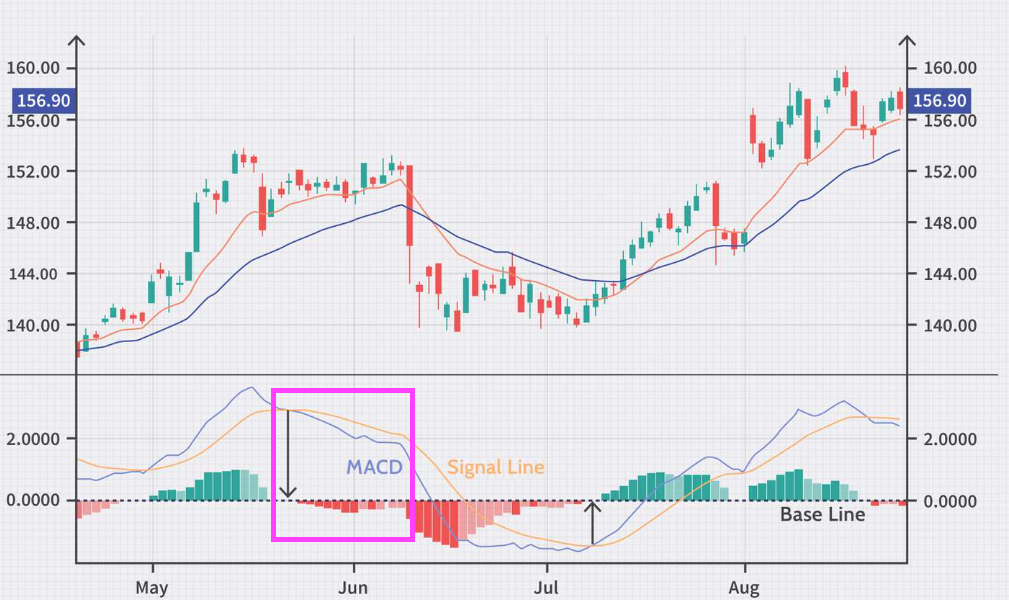

In [ ]:
# we will see if  macd line >0 but histogram is < 0 it possible to drown trend in pink square
# we will reduce size to buy

In [ ]:
# create condition entries price > ema12 , exit price <26
# define weight by macd quadrant
df['ema12'] = df.ta.ema(12)
df['ema26']=df.ta.ema(26)

In [ ]:
long_entries = df['Close'].vbt.crossed_above(df['ema12'])
long_exits = df['Close'].vbt.crossed_below(df['ema26'])

In [ ]:
port=vbt.Portfolio.from_signals(df.Close,
                               entries = long_entries,
                               exits= long_exits,
                               init_cash=10000,
                               size=df['aweight'],
                               size_type='Percent',
                               sl_stop=0.1,
                               direction=0)

this code use Close price 1h to action
1.   this code is about we entries long and exits short
2.   init cash as 10000
3.   we weight size with aweight
4.   use percent type to action
5.   stoploss 10%
5.   direction 0 = buy, long only





In [ ]:
port.plot().show()

In [ ]:
port.stats()
# total return is 45%
# benchmark return is -34% it mean if we holding only we will loss 34%

Start                               2022-01-10 18:00:00
End                                 2023-01-10 18:00:00
Period                                365 days 01:00:00
Start Value                                     10000.0
End Value                                  14556.507958
Total Return [%]                               45.56508
Benchmark Return [%]                          -34.42126
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                               33.56045
Max Drawdown Duration                  99 days 04:00:00
Total Trades                                        435
Total Closed Trades                                 434
Total Open Trades                                     1
Open Trade PnL                                 2.600518
Win Rate [%]                                  33.410138
Best Trade [%]                                 12.83872
Worst Trade [%]                              -13

In [ ]:
trade_log = port.trades.records_readable
trade_log

Exit Trade Id  Column       Size     Entry Timestamp  Avg Entry Price  \
0                0       0   4.349512 2022-01-12 03:00:00       459.821716   
1                1       0   4.154977 2022-01-13 14:00:00       485.282532   
2                2       0  20.963114 2022-01-13 21:00:00       478.541931   
3                3       0   4.153432 2022-01-14 00:00:00       481.408142   
4                4       0  20.826492 2022-01-14 14:00:00       479.730316   
..             ...     ...        ...                 ...              ...   
430            430       0  10.771139 2023-01-06 00:00:00       257.663300   
431            431       0  53.697766 2023-01-06 15:00:00       258.260406   
432            432       0  10.601174 2023-01-10 00:00:00       275.963654   
433            433       0  53.109169 2023-01-10 08:00:00       275.161285   
434            434       0  10.571115 2023-01-10 14:00:00       275.352356   

     Entry Fees      Exit Timestamp  Avg Exit Price  Exit Fees         PnL  \
0           0.0 2022-01-13 11:00:00      478.602844        0.0   81.688738   
1           0.0 2022-01-13 15:00:00      473.258514        0.0  -49.959515   
2           0.0 2022-01-13 22:00:00      476.908112        0.0  -34.249947   
3           0.0 2022-01-14 08:00:00      479.872131        0.0   -6.379716   
4           0.0 2022-01-16 01:00:00      493.170166        0.0  279.904925   
..          ...                 ...             ...        ...         ...   
430         0.0 2023-01-06 05:00:00      256.862213        0.0   -8.628613   
431         0.0 2023-01-09 20:00:00      272.407867        0.0  759.687053   
432         0.0 2023-01-10 01:00:00      274.632965        0.0  -14.106861   
433         0.0 2023-01-10 12:00:00      274.037567        0.0  -59.679743   
434         0.0 2023-01-10 18:00:00      275.598358        0.0    2.600518   

       Return Direction  Status  Position Id  
0    0.040844      Long  Closed            0  
1   -0.024777      Long  Closed            1  
2   -0.003414      Long  Closed            2  
3   -0.003191      Long  Closed            3  
4    0.028015      Long  Closed            4  
..        ...       ...     ...          ...  
430 -0.003109      Long  Closed          430  
431  0.054780      Long  Closed          431  
432 -0.004822      Long  Closed          432  
433 -0.004084      Long  Closed          433  
434  0.000893      Long    Open          434  

[435 rows x 14 columns]

In [ ]:
df['condition'][trade_log['Entry Timestamp']].value_counts()

s-,h-    147
s-,h+    129
s+,h-    117
s+,h+     42
Name: condition, dtype: int64

In [ ]:
port.drawdowns.plot().show()

# 2. section i will write code connect binance api with strategy ema from parameter optimization and mix with get data from binance 

In [ ]:
Apikey = 'you can paste apikey'
secretKey = 'you can paste secret key'
client = Client(Apikey, secretKey)

# i remove my api and secretkey but i have the image of my code are working

In [ ]:
def get_candle(coin,interval='1h',period='60 minute ago'):
    bars = client.get_historical_klines(coin, Client.KLINE_INTERVAL_1HOUR, "365 day ago UTC")
    df = pd.DataFrame(bars, columns=['Date','Open','High','Low','Close','Volume','ctime',
                                'quote_vol','no_trade','taker_base_vol','taker_quote_vol','ignore']).iloc[:,:6]
    df = df.apply(pd.to_numeric)
    df['Date'] = pd.to_datetime(df['Date'], unit='ms').dt.tz_localize('Asia/Bangkok')
    df = df.set_index('Date')


    return df

In [ ]:
bnb = get_candle('BNBBUSD')
bnb

Open   High    Low  Close     Volume
Date                                                            
2022-01-10 23:00:00+07:00  423.0  425.3  422.2  424.8   3561.300
2022-01-11 00:00:00+07:00  424.8  425.3  420.9  422.0   7046.413
2022-01-11 01:00:00+07:00  421.9  425.2  421.4  425.1   7724.440
2022-01-11 02:00:00+07:00  425.2  430.4  425.2  429.0  10344.284
2022-01-11 03:00:00+07:00  429.2  434.0  428.0  433.9  11592.619
...                          ...    ...    ...    ...        ...
2023-01-10 18:00:00+07:00  275.2  276.3  274.8  275.9  13324.023
2023-01-10 19:00:00+07:00  276.0  276.4  275.5  276.3   6996.991
2023-01-10 20:00:00+07:00  276.3  278.9  276.1  278.2  25872.110
2023-01-10 21:00:00+07:00  278.1  278.5  277.5  277.7   6453.860
2023-01-10 22:00:00+07:00  277.7  277.8  276.8  276.8   4189.278

[8760 rows x 5 columns]

# I will craete parameter optimization with fast and slow ema

In [ ]:
windows = np.arange(5, 50)
fast_ewm, slow_ewm = vbt.MA.run_combs(bnb.Close, window=windows,ewm=True, r=2, short_names=['fast', 'slow'])

In [ ]:
windows

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
entries = fast_ewm.ma_crossed_above(slow_ewm)
exits = fast_ewm.ma_crossed_below(slow_ewm)

In [ ]:
entries

fast_window                   5                                             \
fast_ewm                    True                                             
slow_window                   6      7      8      9      10     11     12   
slow_ewm                    True   True   True   True   True   True   True   
Date                                                                         
2022-01-10 20:00:00+07:00  False  False  False  False  False  False  False   
2022-01-10 21:00:00+07:00  False  False  False  False  False  False  False   
2022-01-10 22:00:00+07:00  False  False  False  False  False  False  False   
2022-01-10 23:00:00+07:00  False  False  False  False  False  False  False   
2022-01-11 00:00:00+07:00  False  False  False  False  False  False  False   
...                          ...    ...    ...    ...    ...    ...    ...   
2023-01-10 15:00:00+07:00  False  False  False  False  False  False  False   
2023-01-10 16:00:00+07:00  False  False  False  False  False  False  False   
2023-01-10 17:00:00+07:00  False  False  False  False  False  False  False   
2023-01-10 18:00:00+07:00  False  False  False  False  False  False  False   
2023-01-10 19:00:00+07:00  False  False  False  False  False  False  False   

fast_window                                     ...     45                \
fast_ewm                                        ...   True                 
slow_window                   13     14     15  ...     46     47     48   
slow_ewm                    True   True   True  ...   True   True   True   
Date                                            ...                        
2022-01-10 20:00:00+07:00  False  False  False  ...  False  False  False   
2022-01-10 21:00:00+07:00  False  False  False  ...  False  False  False   
2022-01-10 22:00:00+07:00  False  False  False  ...  False  False  False   
2022-01-10 23:00:00+07:00  False  False  False  ...  False  False  False   
2022-01-11 00:00:00+07:00  False  False  False  ...  False  False  False   
...                          ...    ...    ...  ...    ...    ...    ...   
2023-01-10 15:00:00+07:00   True   True   True  ...  False  False  False   
2023-01-10 16:00:00+07:00  False  False  False  ...  False  False  False   
2023-01-10 17:00:00+07:00  False  False  False  ...  False  False  False   
2023-01-10 18:00:00+07:00  False  False  False  ...  False  False  False   
2023-01-10 19:00:00+07:00  False  False  False  ...  False  False  False   

fast_window                          46                   47            48  
fast_ewm                           True                 True          True  
slow_window                   49     47     48     49     48     49     49  
slow_ewm                    True   True   True   True   True   True   True  
Date                                                                        
2022-01-10 20:00:00+07:00  False  False  False  False  False  False  False  
2022-01-10 21:00:00+07:00  False  False  False  False  False  False  False  
2022-01-10 22:00:00+07:00  False  False  False  False  False  False  False  
2022-01-10 23:00:00+07:00  False  False  False  False  False  False  False  
2022-01-11 00:00:00+07:00  False  False  False  False  False  False  False  
...                          ...    ...    ...    ...    ...    ...    ...  
2023-01-10 15:00:00+07:00  False  False  False  False  False  False  False  
2023-01-10 16:00:00+07:00  False  False  False  False  False  False  False  
2023-01-10 17:00:00+07:00  False  False  False  False  False  False  False  
2023-01-10 18:00:00+07:00  False  False  False  False  False  False  False  
2023-01-10 19:00:00+07:00  False  False  False  False  False  False  False  

[8760 rows x 990 columns]

In [ ]:
exits

fast_window                   5                                             \
fast_ewm                    True                                             
slow_window                   6      7      8      9      10     11     12   
slow_ewm                    True   True   True   True   True   True   True   
Date                                                                         
2022-01-10 20:00:00+07:00  False  False  False  False  False  False  False   
2022-01-10 21:00:00+07:00  False  False  False  False  False  False  False   
2022-01-10 22:00:00+07:00  False  False  False  False  False  False  False   
2022-01-10 23:00:00+07:00  False  False  False  False  False  False  False   
2022-01-11 00:00:00+07:00  False  False  False  False  False  False  False   
...                          ...    ...    ...    ...    ...    ...    ...   
2023-01-10 15:00:00+07:00  False  False  False  False  False  False  False   
2023-01-10 16:00:00+07:00  False  False  False  False  False  False  False   
2023-01-10 17:00:00+07:00  False  False  False  False  False  False  False   
2023-01-10 18:00:00+07:00  False  False  False  False  False  False  False   
2023-01-10 19:00:00+07:00  False  False  False  False  False  False  False   

fast_window                                     ...     45                \
fast_ewm                                        ...   True                 
slow_window                   13     14     15  ...     46     47     48   
slow_ewm                    True   True   True  ...   True   True   True   
Date                                            ...                        
2022-01-10 20:00:00+07:00  False  False  False  ...  False  False  False   
2022-01-10 21:00:00+07:00  False  False  False  ...  False  False  False   
2022-01-10 22:00:00+07:00  False  False  False  ...  False  False  False   
2022-01-10 23:00:00+07:00  False  False  False  ...  False  False  False   
2022-01-11 00:00:00+07:00  False  False  False  ...  False  False  False   
...                          ...    ...    ...  ...    ...    ...    ...   
2023-01-10 15:00:00+07:00  False  False  False  ...  False  False  False   
2023-01-10 16:00:00+07:00  False  False  False  ...  False  False  False   
2023-01-10 17:00:00+07:00  False  False  False  ...  False  False  False   
2023-01-10 18:00:00+07:00  False  False  False  ...  False  False  False   
2023-01-10 19:00:00+07:00  False  False  False  ...  False  False  False   

fast_window                          46                   47            48  
fast_ewm                           True                 True          True  
slow_window                   49     47     48     49     48     49     49  
slow_ewm                    True   True   True   True   True   True   True  
Date                                                                        
2022-01-10 20:00:00+07:00  False  False  False  False  False  False  False  
2022-01-10 21:00:00+07:00  False  False  False  False  False  False  False  
2022-01-10 22:00:00+07:00  False  False  False  False  False  False  False  
2022-01-10 23:00:00+07:00  False  False  False  False  False  False  False  
2022-01-11 00:00:00+07:00  False  False  False  False  False  False  False  
...                          ...    ...    ...    ...    ...    ...    ...  
2023-01-10 15:00:00+07:00  False  False  False  False  False  False  False  
2023-01-10 16:00:00+07:00  False  False  False  False  False  False  False  
2023-01-10 17:00:00+07:00  False  False  False  False  False  False  False  
2023-01-10 18:00:00+07:00  False  False  False  False  False  False  False  
2023-01-10 19:00:00+07:00  False  False  False  False  False  False  False  

[8760 rows x 990 columns]

In [ ]:
pf_kwargs = dict(size= np.inf, freq='1H')
pf = vbt.Portfolio.from_signals(bnb.Close, entries, exits, **pf_kwargs)


In [ ]:
pf.total_return()

fast_window  fast_ewm  slow_window  slow_ewm
5            True      6            True       -0.110289
                       7            True       -0.212306
                       8            True       -0.173387
                       9            True       -0.228902
                       10           True       -0.179941
                                                  ...   
46           True      48           True        0.045045
                       49           True        0.029506
47           True      48           True        0.011616
                       49           True        0.031739
48           True      49           True        0.016078
Name: total_return, Length: 990, dtype: float64

In [ ]:
comb_ret = pf.total_return()

In [ ]:
comb_ret.max()

0.13566733078595264

In [ ]:
fig = pf.total_return().vbt.heatmap(
    x_level='fast_window', y_level='slow_window', symmetric=True,
    trace_kwargs=dict(colorbar=dict(title='Total return', tickformat='%')))
fig.show()

In [ ]:
comb_ret.loc[comb_ret.values==comb_ret.max()]

fast_window  fast_ewm  slow_window  slow_ewm
41           True      42           True        0.135667
Name: total_return, dtype: float64

In [ ]:
comb_ret.idxmax()

# we found 41,42 is best parameter for ema crossing

(41, True, 42, True)

In [ ]:
def craete_spot_signal(df,fast_ema=41,slow_ema=42):

    df['fast_ema'] = df.ta.ema(fast_ema)
    df['slow_ema'] = df.ta.ema(slow_ema)

    df['trend'] = df['fast_ema'] > df['slow_ema']
    # crate trend when ema 
    df.loc[(df['trend']==True) & (df['trend'].shift() ==False ), 'action'] = 'buy'
    df.loc[(df['trend']==False) & (df['trend'].shift() ==True ), 'action'] = 'sell'
    print(df)
    return df

In [ ]:
craete_spot_signal(bnb)

Open   High    Low  Close     Volume    fast_ema  \
Date                                                                           
2022-01-10 23:00:00+07:00  423.0  425.3  422.2  424.8   3561.300         NaN   
2022-01-11 00:00:00+07:00  424.8  425.3  420.9  422.0   7046.413         NaN   
2022-01-11 01:00:00+07:00  421.9  425.2  421.4  425.1   7724.440         NaN   
2022-01-11 02:00:00+07:00  425.2  430.4  425.2  429.0  10344.284         NaN   
2022-01-11 03:00:00+07:00  429.2  434.0  428.0  433.9  11592.619         NaN   
...                          ...    ...    ...    ...        ...         ...   
2023-01-10 18:00:00+07:00  275.2  276.3  274.8  275.9  13324.023  274.212620   
2023-01-10 19:00:00+07:00  276.0  276.4  275.5  276.3   6996.991  274.312019   
2023-01-10 20:00:00+07:00  276.3  278.9  276.1  278.2  25872.110  274.497161   
2023-01-10 21:00:00+07:00  278.1  278.5  277.5  277.7   6453.860  274.649677   
2023-01-10 22:00:00+07:00  277.7  277.8  276.8  276.8   4189.278  274.752073   

                             slow_ema  trend action  
Date                                                 
2022-01-10 23:00:00+07:00         NaN  False    NaN  
2022-01-11 00:00:00+07:00         NaN  False    NaN  
2022-01-11 01:00:00+07:00         NaN  False    NaN  
2022-01-11 02:00:00+07:00         NaN  False    NaN  
2022-01-11 03:00:00+07:00         NaN  False    NaN  
...                               ...    ...    ...  
2023-01-10 18:00:00+07:00  274.138271   True    NaN  
2023-01-10 19:00:00+07:00  274.238817   True    NaN  
2023-01-10 20:00:00+07:00  274.423058   True    NaN  
2023-01-10 21:00:00+07:00  274.575474   True    NaN  
2023-01-10 22:00:00+07:00  274.678940   True    NaN  

[8760 rows x 9 columns]

In [ ]:
bnb[bnb.action=='buy']

Open   High    Low  Close     Volume    fast_ema  \
Date                                                                           
2022-01-12 14:00:00+07:00  479.1  483.8  479.1  483.0  24921.391  453.132404   
2022-01-25 21:00:00+07:00  381.1  381.7  377.8  378.8   8825.809  370.295046   
2022-01-28 00:00:00+07:00  390.0  393.2  388.8  391.6  12505.614  375.168979   
2022-02-01 12:00:00+07:00  383.2  385.5  382.6  384.6   8802.751  379.950740   
2022-02-04 15:00:00+07:00  376.8  385.5  376.0  382.3  46761.510  373.490708   
...                          ...    ...    ...    ...        ...         ...   
2022-12-20 07:00:00+07:00  249.4  249.5  248.0  248.1   8604.255  246.172119   
2022-12-27 19:00:00+07:00  244.9  246.2  244.8  246.2   9397.414  243.822555   
2022-12-29 02:00:00+07:00  244.5  245.1  243.2  245.0  11289.377  244.005359   
2022-12-30 15:00:00+07:00  244.3  245.8  244.0  245.2  13772.570  244.703990   
2023-01-02 11:00:00+07:00  247.0  247.1  246.3  246.9   5516.414  245.009112   

                             slow_ema  trend action  
Date                                                 
2022-01-12 14:00:00+07:00  452.385714   True    buy  
2022-01-25 21:00:00+07:00  370.289489   True    buy  
2022-01-28 00:00:00+07:00  375.163467   True    buy  
2022-02-01 12:00:00+07:00  379.945768   True    buy  
2022-02-04 15:00:00+07:00  373.487680   True    buy  
...                               ...    ...    ...  
2022-12-20 07:00:00+07:00  246.169901   True    buy  
2022-12-27 19:00:00+07:00  243.821310   True    buy  
2022-12-29 02:00:00+07:00  244.005099   True    buy  
2022-12-30 15:00:00+07:00  244.703812   True    buy  
2023-01-02 11:00:00+07:00  245.008268   True    buy  

[62 rows x 9 columns]

In [ ]:
bnb[bnb.action=='sell']

Open   High    Low  Close     Volume    fast_ema  \
Date                                                                           
2022-01-17 12:00:00+07:00  481.3  482.3  475.4  476.0  13587.464  490.335035   
2022-01-27 06:00:00+07:00  364.4  366.6  362.6  366.4   6049.803  375.908601   
2022-01-30 18:00:00+07:00  381.3  381.7  379.0  379.1   4152.757  384.683438   
2022-02-02 16:00:00+07:00  371.3  372.9  368.6  372.6  17974.410  380.931802   
2022-02-08 23:00:00+07:00  410.7  411.3  407.6  408.2  11182.240  422.223667   
...                          ...    ...    ...    ...        ...         ...   
2022-12-19 19:00:00+07:00  241.2  243.3  241.0  242.2  15885.944  246.291020   
2022-12-22 06:00:00+07:00  247.2  247.3  245.9  246.0   6438.711  247.876251   
2022-12-28 15:00:00+07:00  244.4  245.2  242.1  242.3  18684.738  243.990051   
2022-12-30 14:00:00+07:00  243.6  244.4  242.9  244.3  22672.080  244.679189   
2023-01-01 09:00:00+07:00  243.4  244.2  243.2  244.2   6733.086  245.263671   

                             slow_ema  trend action  
Date                                                 
2022-01-17 12:00:00+07:00  490.350353  False   sell  
2022-01-27 06:00:00+07:00  375.909663  False   sell  
2022-01-30 18:00:00+07:00  384.683673  False   sell  
2022-02-02 16:00:00+07:00  380.939603  False   sell  
2022-02-08 23:00:00+07:00  422.234855  False   sell  
...                               ...    ...    ...  
2022-12-19 19:00:00+07:00  246.291934  False   sell  
2022-12-22 06:00:00+07:00  247.878277  False   sell  
2022-12-28 15:00:00+07:00  243.991154  False   sell  
2022-12-30 14:00:00+07:00  244.679608  False   sell  
2023-01-01 09:00:00+07:00  245.264598  False   sell  

[61 rows x 9 columns]

In [ ]:
signal_vectorbt = bnb.ta.tsignals(bnb.trend,'buy',append=True,trade_offset=1)

In [ ]:
signal_vectorbt

TS_Trends  TS_Trades  TS_Entries  TS_Exits
Date                                                                 
2022-01-10 21:00:00+07:00          0          0           0         0
2022-01-10 22:00:00+07:00          0          0           0         0
2022-01-10 23:00:00+07:00          0          0           0         0
2022-01-11 00:00:00+07:00          0          0           0         0
2022-01-11 01:00:00+07:00          0          0           0         0
...                              ...        ...         ...       ...
2023-01-10 16:00:00+07:00          1          0           0         0
2023-01-10 17:00:00+07:00          1          0           0         0
2023-01-10 18:00:00+07:00          1          0           0         0
2023-01-10 19:00:00+07:00          1          0           0         0
2023-01-10 20:00:00+07:00          1          0           0         0

[8760 rows x 4 columns]

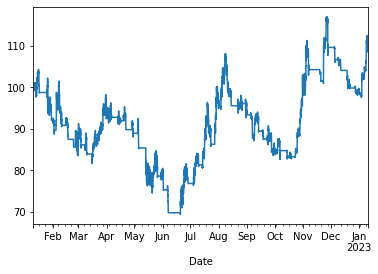

In [ ]:
port = vbt.Portfolio.from_signals(bnb.Close,
                                entries = signal_vectorbt.TS_Entries,
                                exits = signal_vectorbt.TS_Exits,
                                size_type = 'Value',
                                direction ='Longonly',
                                init_cash = 100,
                                )

port.value().plot()

In [ ]:
trade_log = port.trades.records_readable
trade_log

Exit Trade Id  Column      Size           Entry Timestamp  \
0               0       0  0.207297 2022-01-12 15:00:00+07:00   
1               1       0  0.258375 2022-01-25 22:00:00+07:00   
2               2       0  0.246228 2022-01-28 01:00:00+07:00   
3               3       0  0.239005 2022-02-01 13:00:00+07:00   
4               4       0  0.230049 2022-02-04 16:00:00+07:00   
..            ...     ...       ...                       ...   
57             57       0  0.405300 2022-12-20 08:00:00+07:00   
58             58       0  0.406620 2022-12-27 20:00:00+07:00   
59             59       0  0.403468 2022-12-29 03:00:00+07:00   
60             60       0  0.403798 2022-12-30 16:00:00+07:00   
61             61       0  0.398895 2023-01-02 12:00:00+07:00   

    Avg Entry Price  Entry Fees            Exit Timestamp  Avg Exit Price  \
0             482.4         0.0 2022-01-17 13:00:00+07:00           476.5   
1             382.3         0.0 2022-01-27 07:00:00+07:00           366.9   
2             385.0         0.0 2022-01-30 19:00:00+07:00           373.9   
3             385.2         0.0 2022-02-02 17:00:00+07:00           375.0   
4             389.6         0.0 2022-02-09 00:00:00+07:00           414.4   
..              ...         ...                       ...             ...   
57            248.3         0.0 2022-12-22 07:00:00+07:00           246.4   
58            245.6         0.0 2022-12-28 16:00:00+07:00           243.2   
59            245.1         0.0 2022-12-30 15:00:00+07:00           245.2   
60            245.0         0.0 2023-01-01 10:00:00+07:00           244.1   
61            247.1         0.0 2023-01-10 20:00:00+07:00           277.9   

    Exit Fees        PnL    Return Direction  Status  Position Id  
0         0.0  -1.223051 -0.012231      Long  Closed            0  
1         0.0  -3.978982 -0.040283      Long  Closed            1  
2         0.0  -2.733136 -0.028831      Long  Closed            2  
3         0.0  -2.437854 -0.026480      Long  Closed            3  
4         0.0   5.705208  0.063655      Long  Closed            4  
..        ...        ...       ...       ...     ...          ...  
57        0.0  -0.770070 -0.007652      Long  Closed           57  
58        0.0  -0.975889 -0.009772      Long  Closed           58  
59        0.0   0.040347  0.000408      Long  Closed           59  
60        0.0  -0.363418 -0.003673      Long  Closed           60  
61        0.0  12.285975  0.124646      Long    Open           61  

[62 rows x 14 columns]

In [ ]:
returns = port.returns()

Note cumulative return is 10.853%





/usr/local/lib/python3.8/dist-packages/pyfolio/pos.py:25: UserWarning:

Module "zipline.assets" not found; multipliers will not be applied to position notionals.



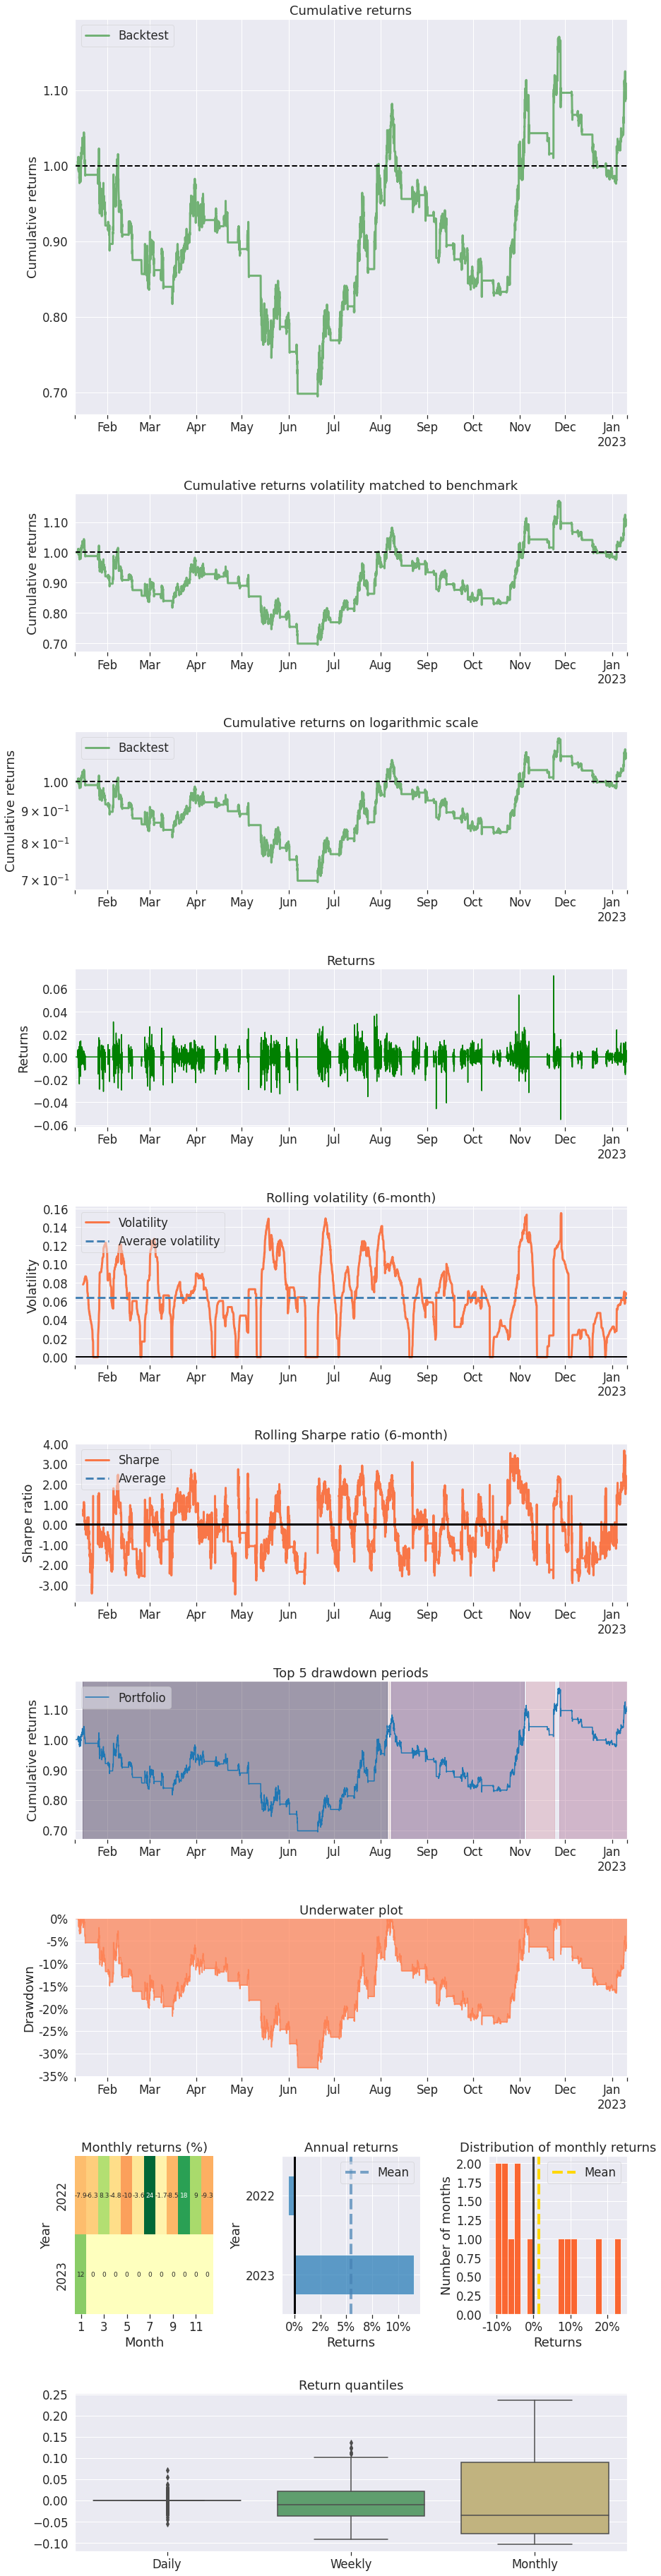

In [ ]:
import pyfolio as pf

pf.tears.create_returns_tear_sheet(returns)

In [ ]:
live_date = returns.index[-350]#.tz_localize('UTC')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.8/dist-packages/pyfolio/timeseries.py:1258: FutureWarning:

Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.



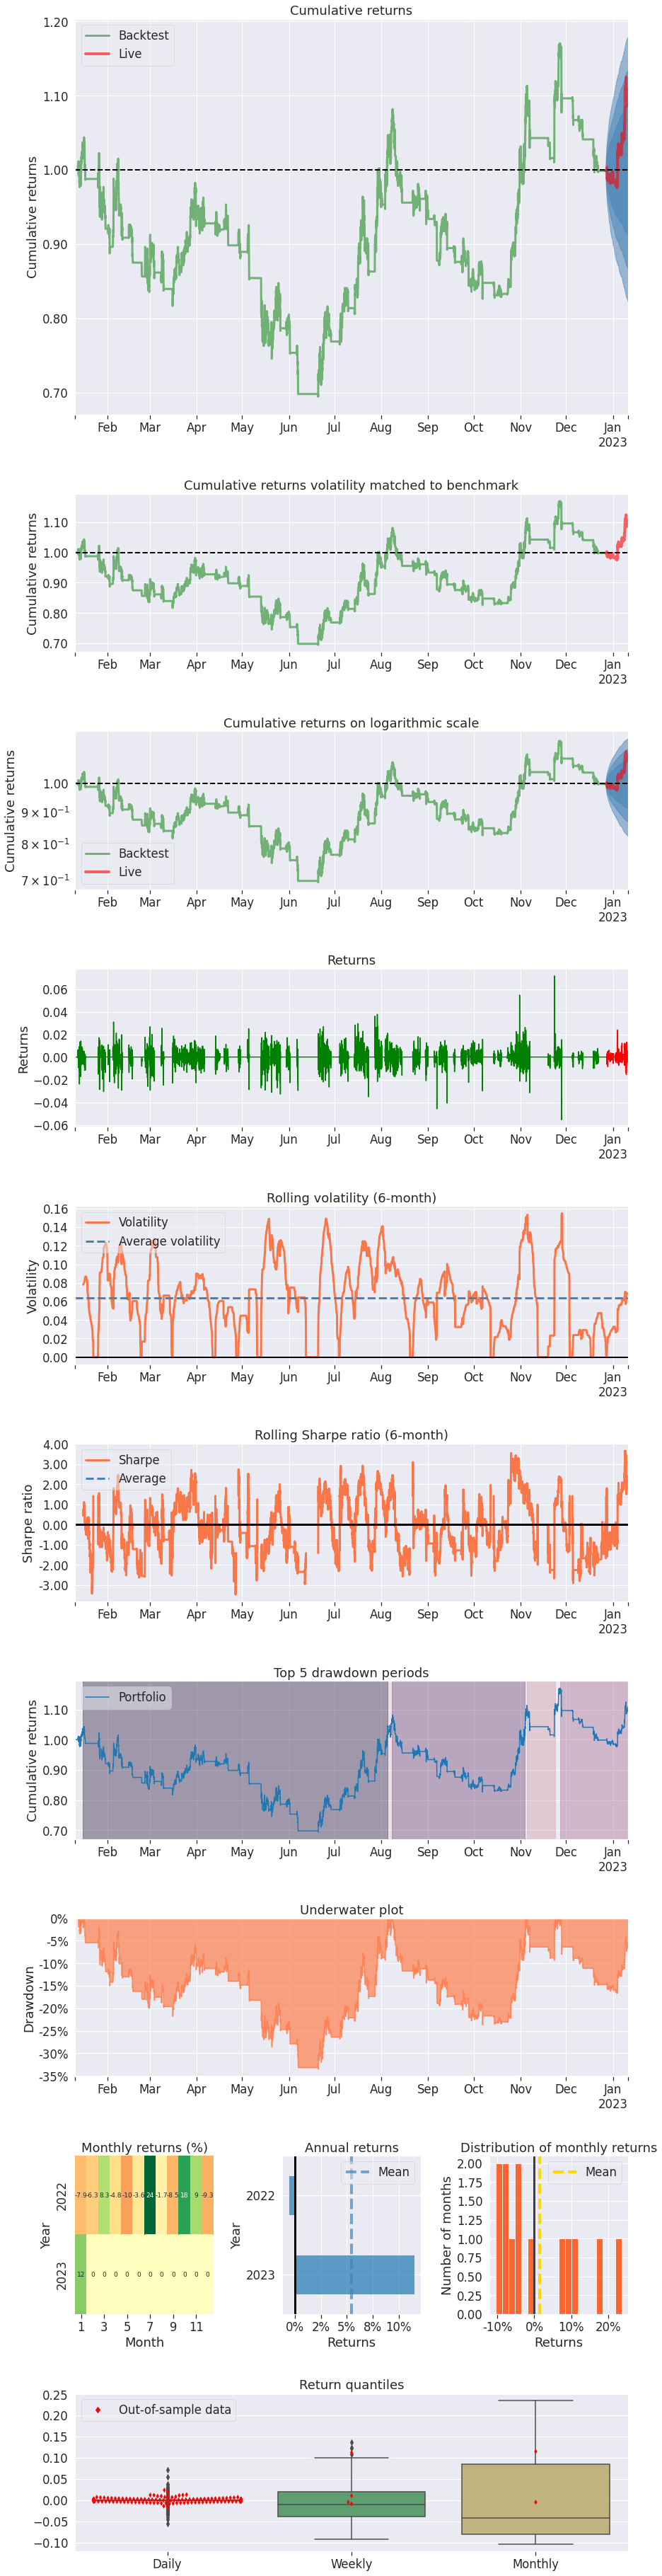

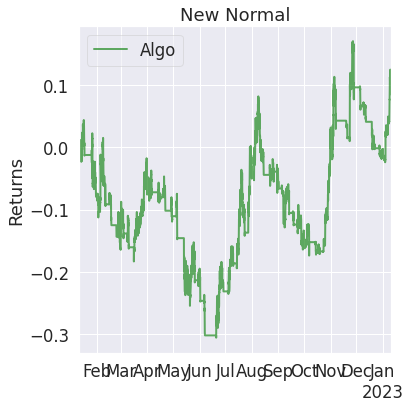

In [ ]:
pf.tears.create_full_tear_sheet(returns,live_start_date=live_date)

# 3. Interaction with binance 

In [ ]:
import mplfinance as mpf
def chart(df):
    fast_ema = mpf.make_addplot(df['fast_ema'], color='b')
    slow_ema = mpf.make_addplot(df['slow_ema'], color='g')

    mpf.plot(df,type='candle',style='yahoo',addplot = [fast_ema,slow_ema])

In [ ]:
from IPython.display import clear_output

def mkt_order(df,quantity,coin):
    if df.iloc[-1]['action'] == 'buy':
        print('buy action start')
        order = client.order_market_buy(symbol=coin, quantity = quantity)
        time.sleep(1)
        buy_log = client.get_order(symbol=coin, orderId=order['orderId'])
        log.append(['buy',buy_log]) #this section can write code about loging
        print(f"transaction success buy {coin} , quantity{quantity}")
    elif df.iloc[-1]['action'] == 'sell':
        print('sell')
        order = client.order_market_sell(symbol=coin, quantity = quantity)
        time.sleep(1)
        sell_log = client.get_order(symbol=coin, orderId=order['orderId'])
        log.append(['sell',sell_log]) #this section can write code about loging
        print(f"transaction success sell {coin} , quantity{quantity} ")

    else:
        print('no action')

In [ ]:
def createOrder(ticker,fast_ema=41,slow_ema=42,quantity=0.05,interval='1h',period='60 min ago'):
    # noteuse amount 0.05 in bnb cause to binance support size limit minimum size with this quantity
    # for experiment
    df = get_candle(ticker)
    
    last_price = df.iloc[-1].Close
    print(df.iloc[-1])
    print(df.iloc[-2])
    df = craete_spot_signal(df,fast_ema=fast_ema,slow_ema=slow_ema)

    mkt_order(df,quantity,ticker)
    
    chart(df)
    return df

In [ ]:
from IPython.display import clear_output

log = []

while True:
    clear_output(wait=True)
    time.sleep(60-time.time()%60)
    createOrder('BNBBUSD',fast_ema=41,slow_ema=42
                ,quantity= 0.05,interval='1h'
                ,period='60 min ago')

picture when runing this function to connect binance api

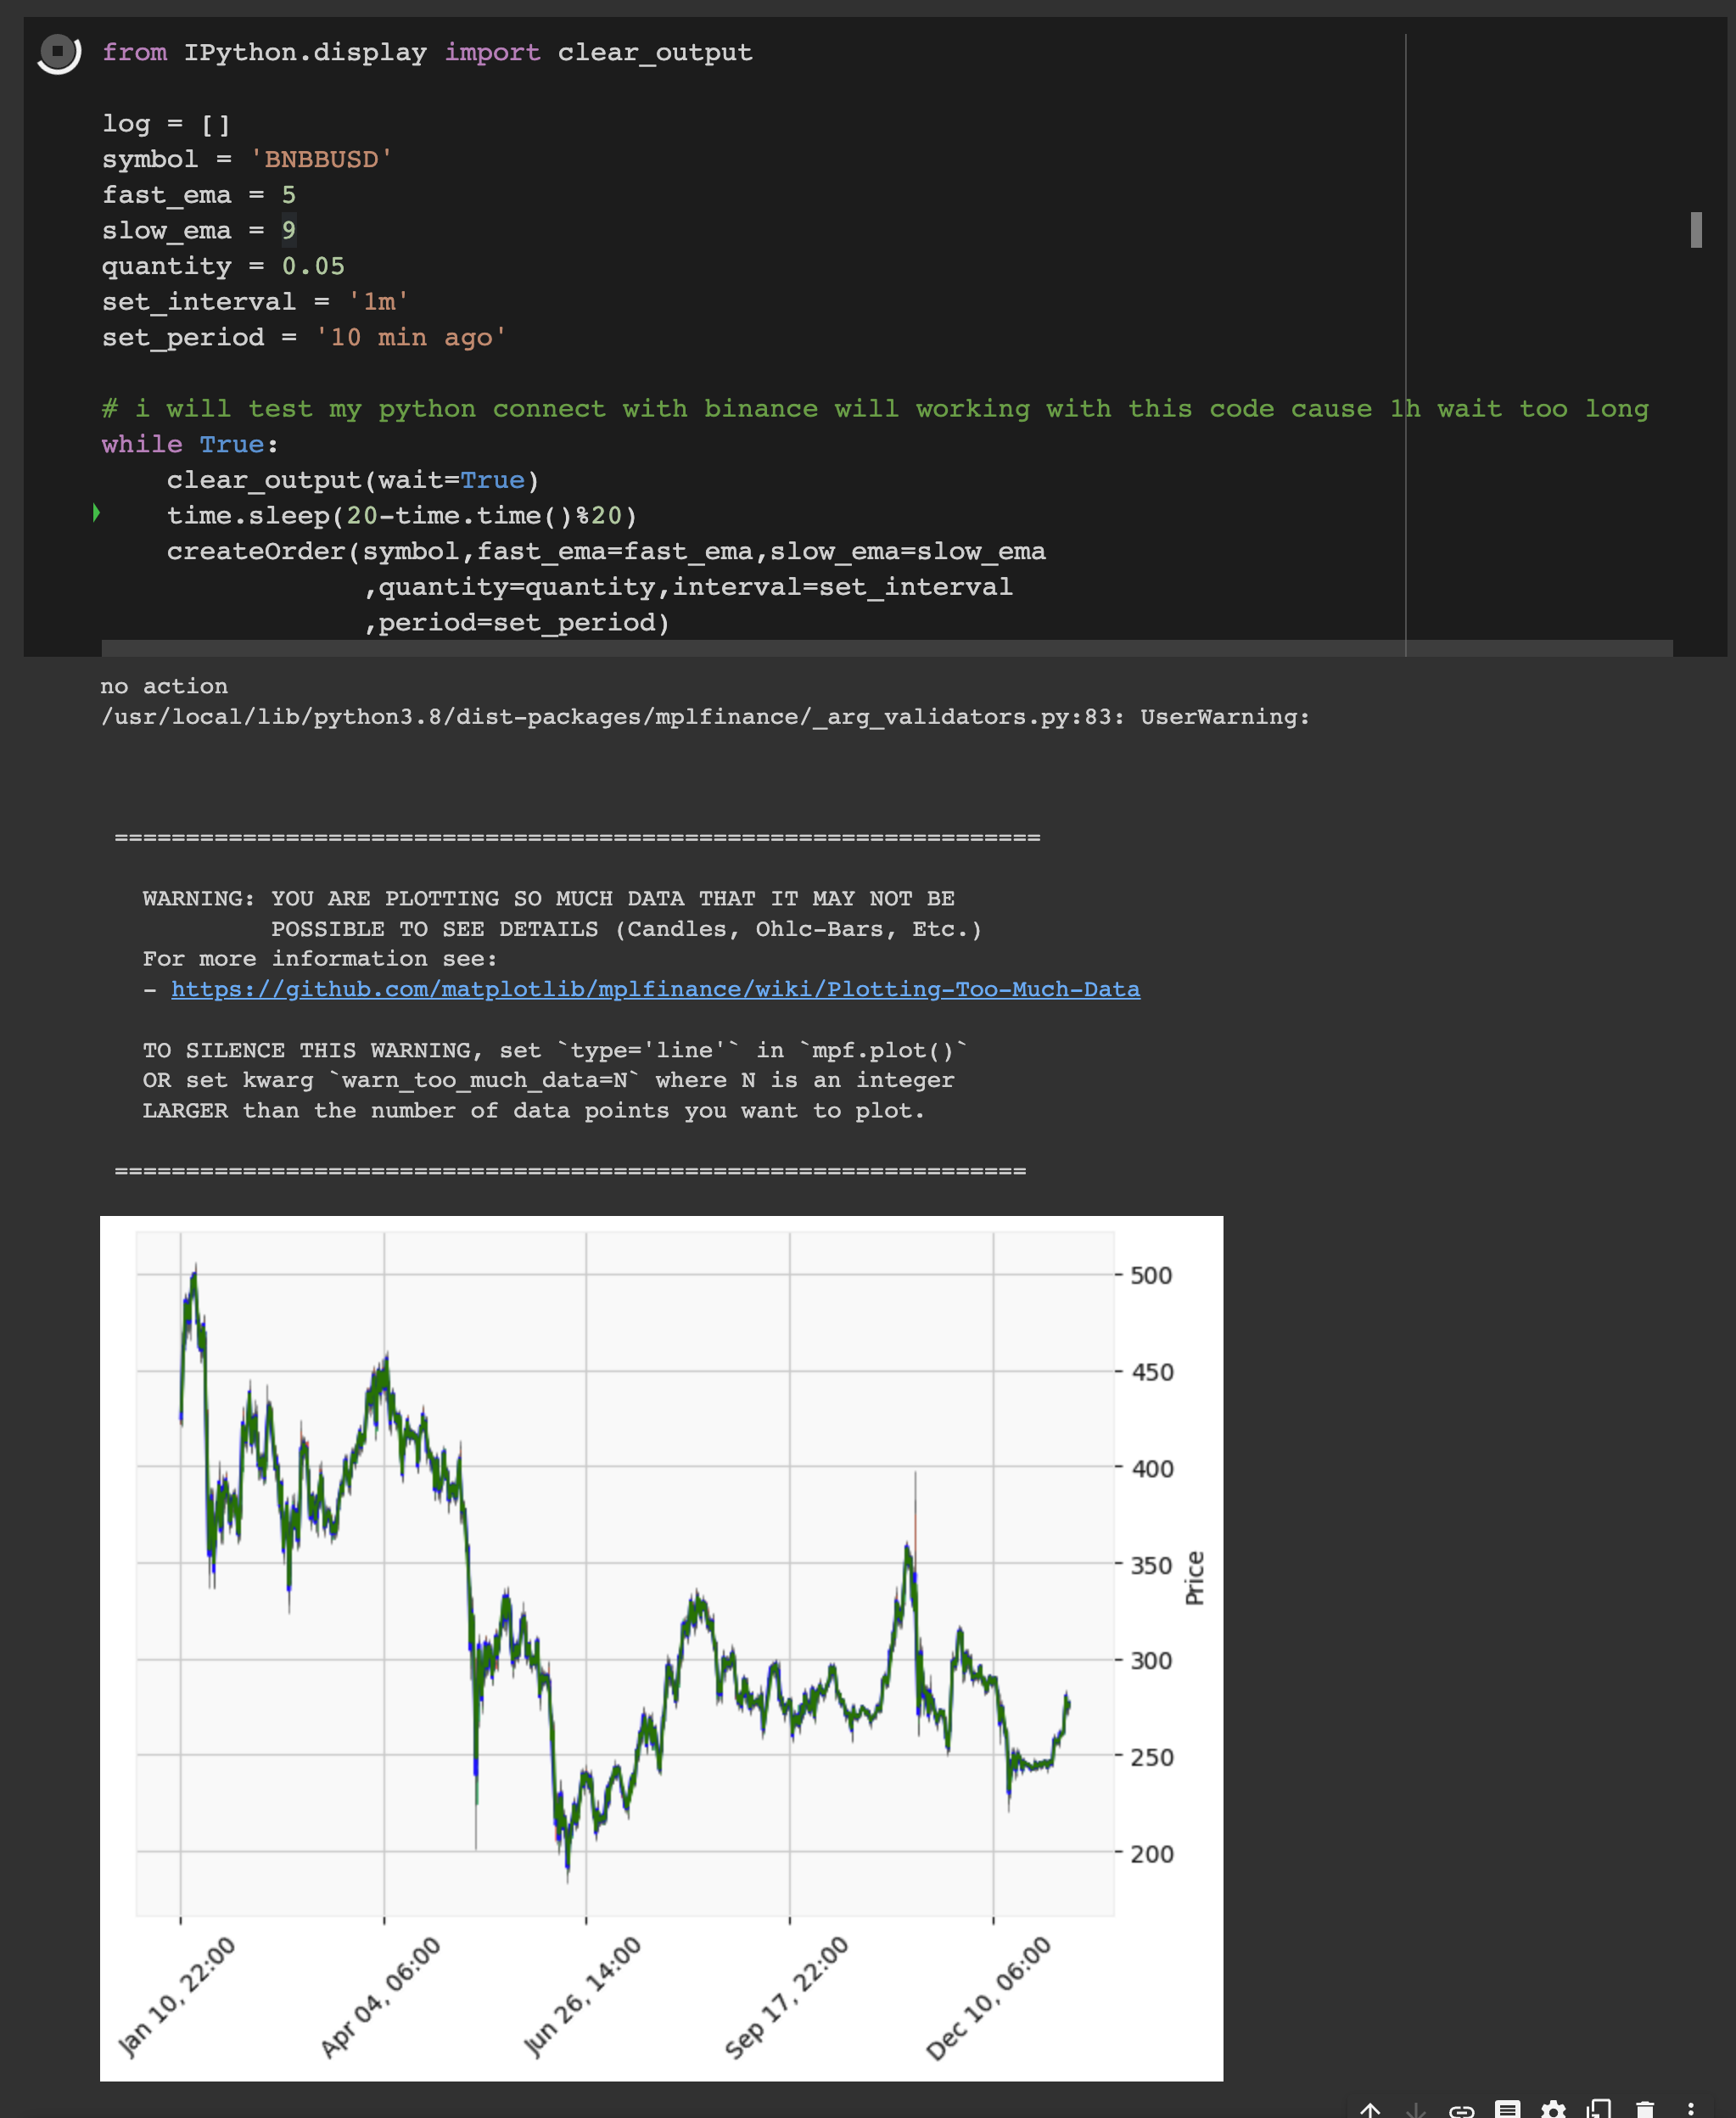

# this section will modify variables for experiment

In [ ]:
def get_candle(coin,interval='1m',period='10 minute ago'):
    bars = client.get_historical_klines(coin, interval, period)
    df = pd.DataFrame(bars, columns=['Date','Open','High','Low','Close','Volume','ctime',
                                'quote_vol','no_trade','taker_base_vol','taker_quote_vol','ignore']).iloc[:,:6]
    df = df.apply(pd.to_numeric)
    df['Date'] = pd.to_datetime(df['Date'], unit='ms').dt.tz_localize('Asia/Bangkok')
    df = df.set_index('Date')
    print(df)
    return df

In [ ]:
from IPython.display import clear_output

log = []

# i will test my python connect with binance will working with this code cause 1h wait too long
while True:
    clear_output(wait=True)
    time.sleep(60-time.time()%60)
    createOrder('BNBBUSD',fast_ema=2,slow_ema=5,quantity=0.05,interval='1m',period='10 min ago')

KeyboardInterrupt: ignored

# Result after run code 

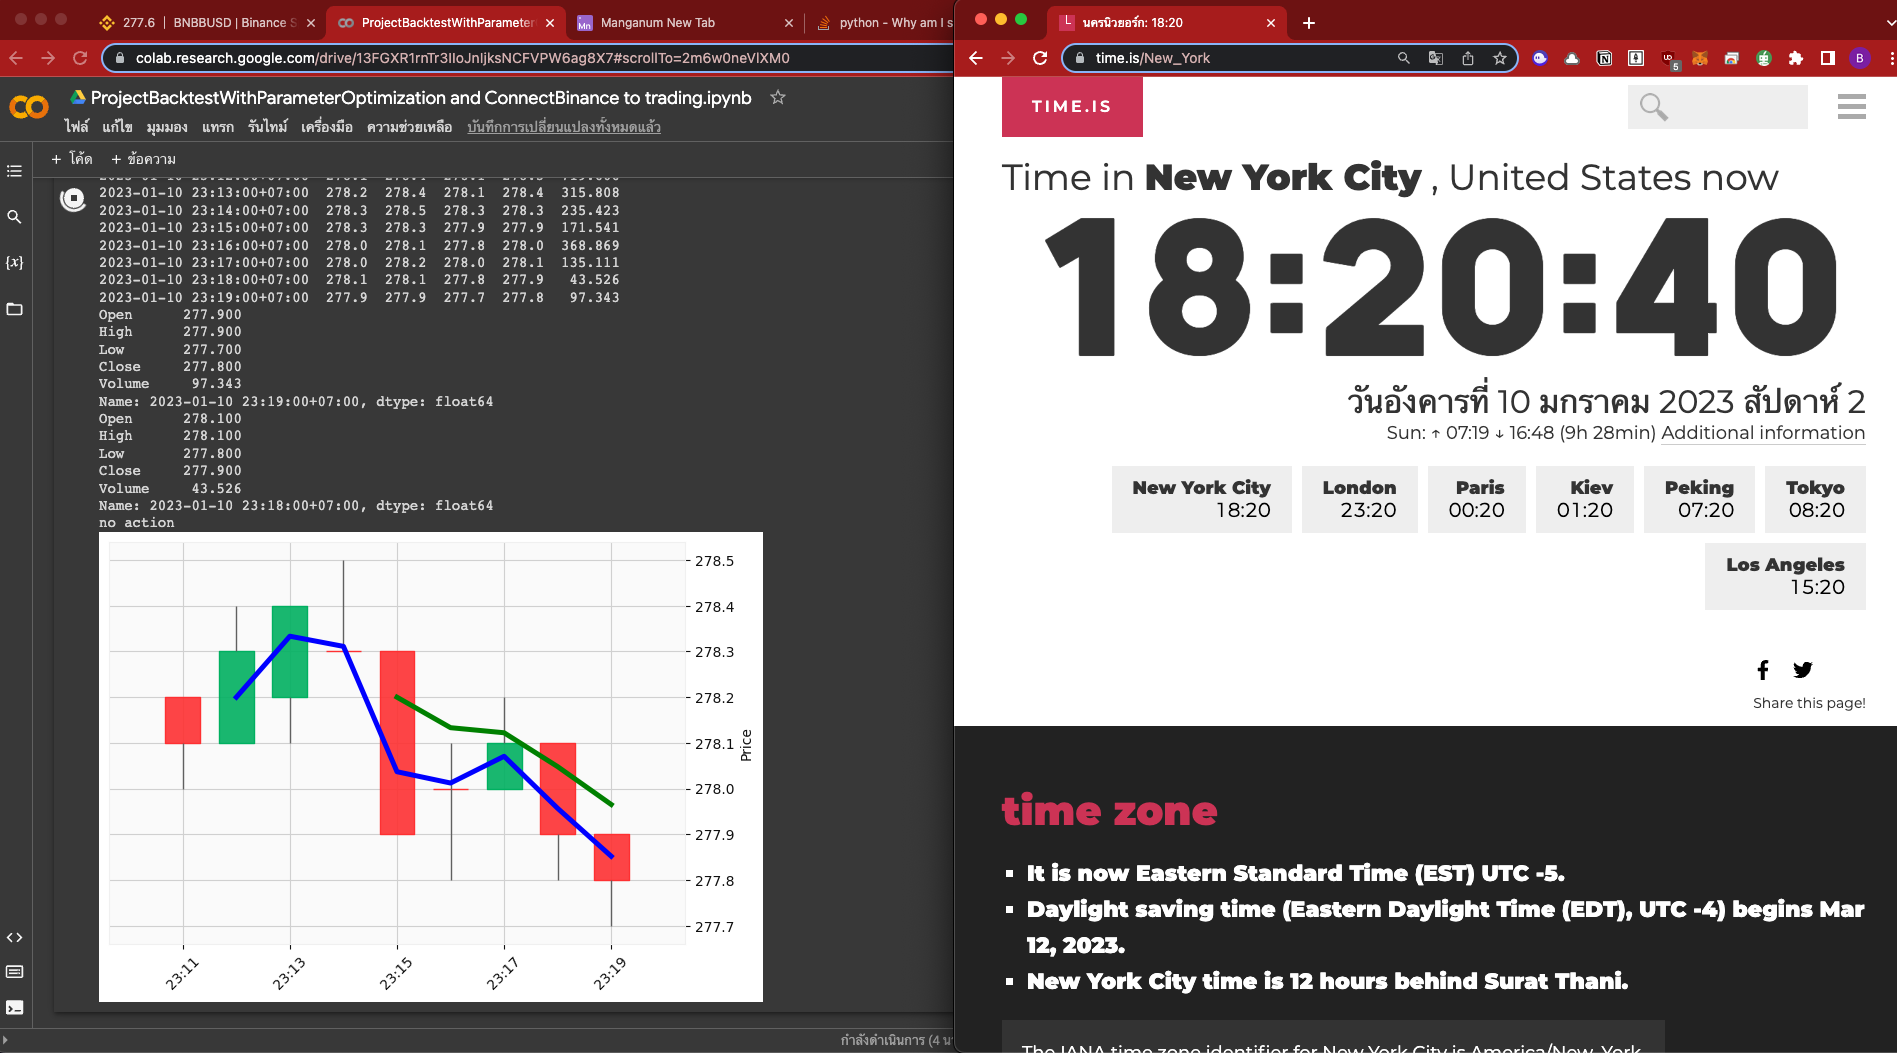

# action buy when ema are crossing

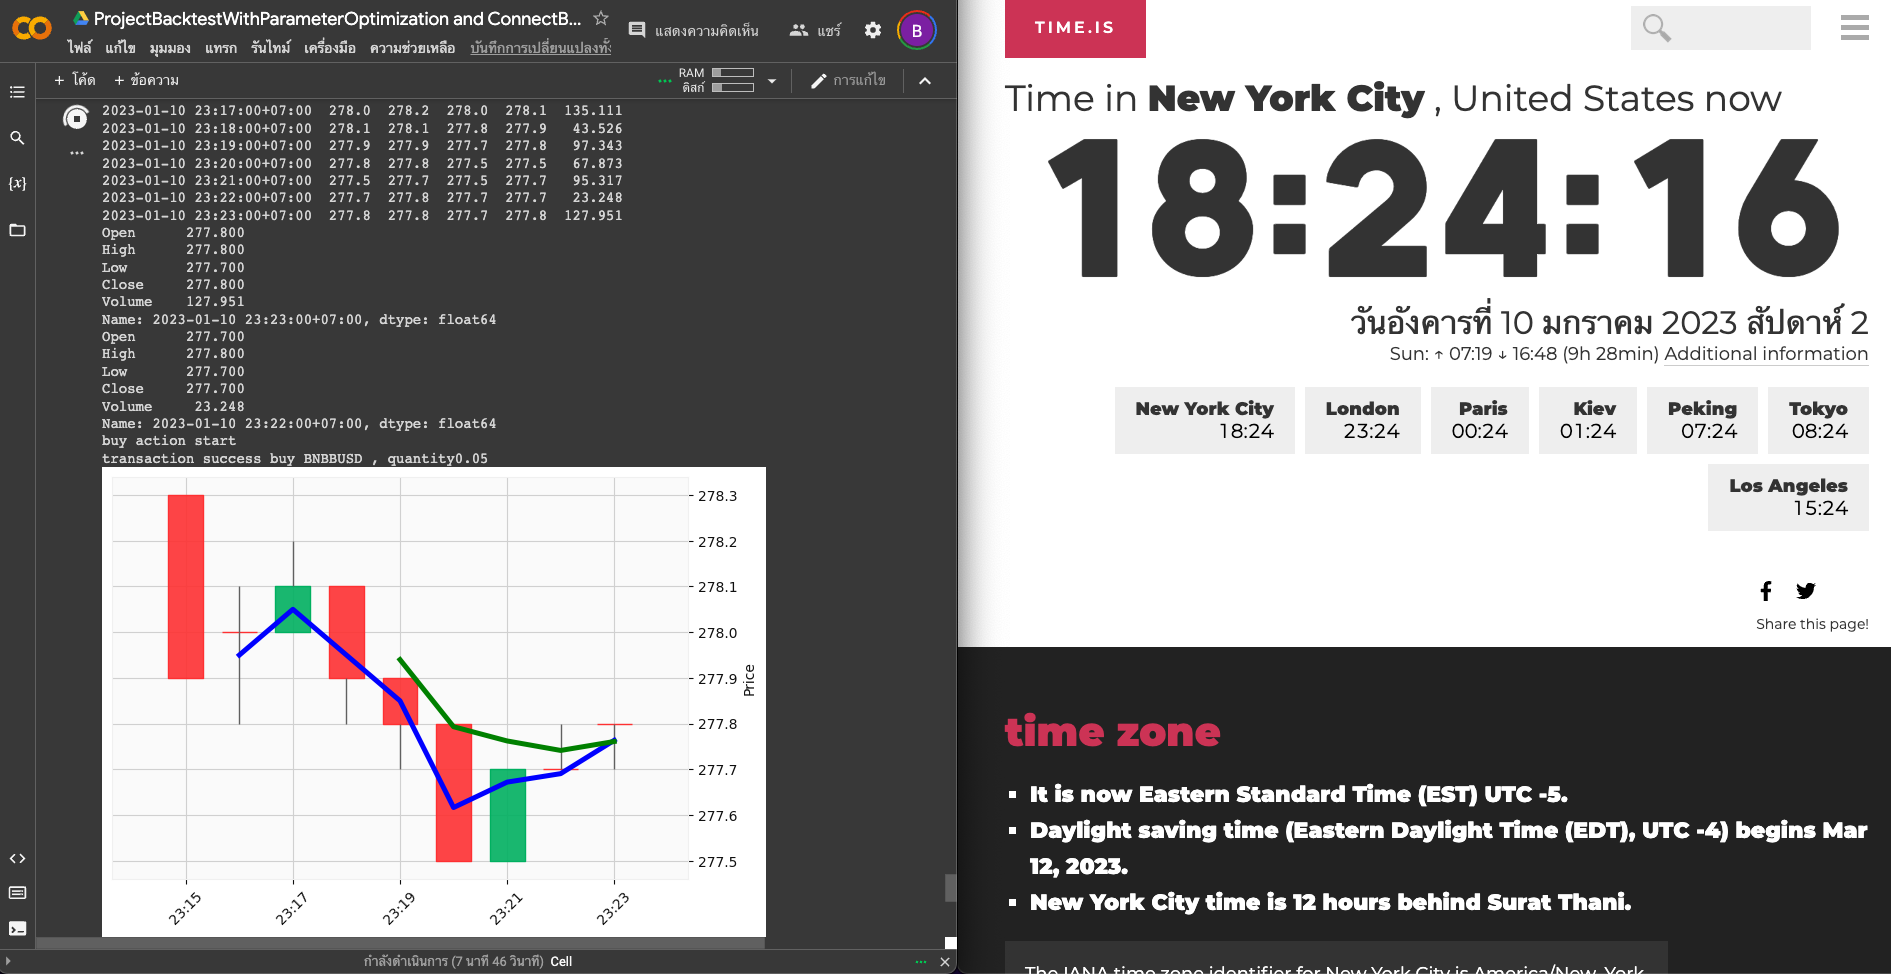

# order history in binance

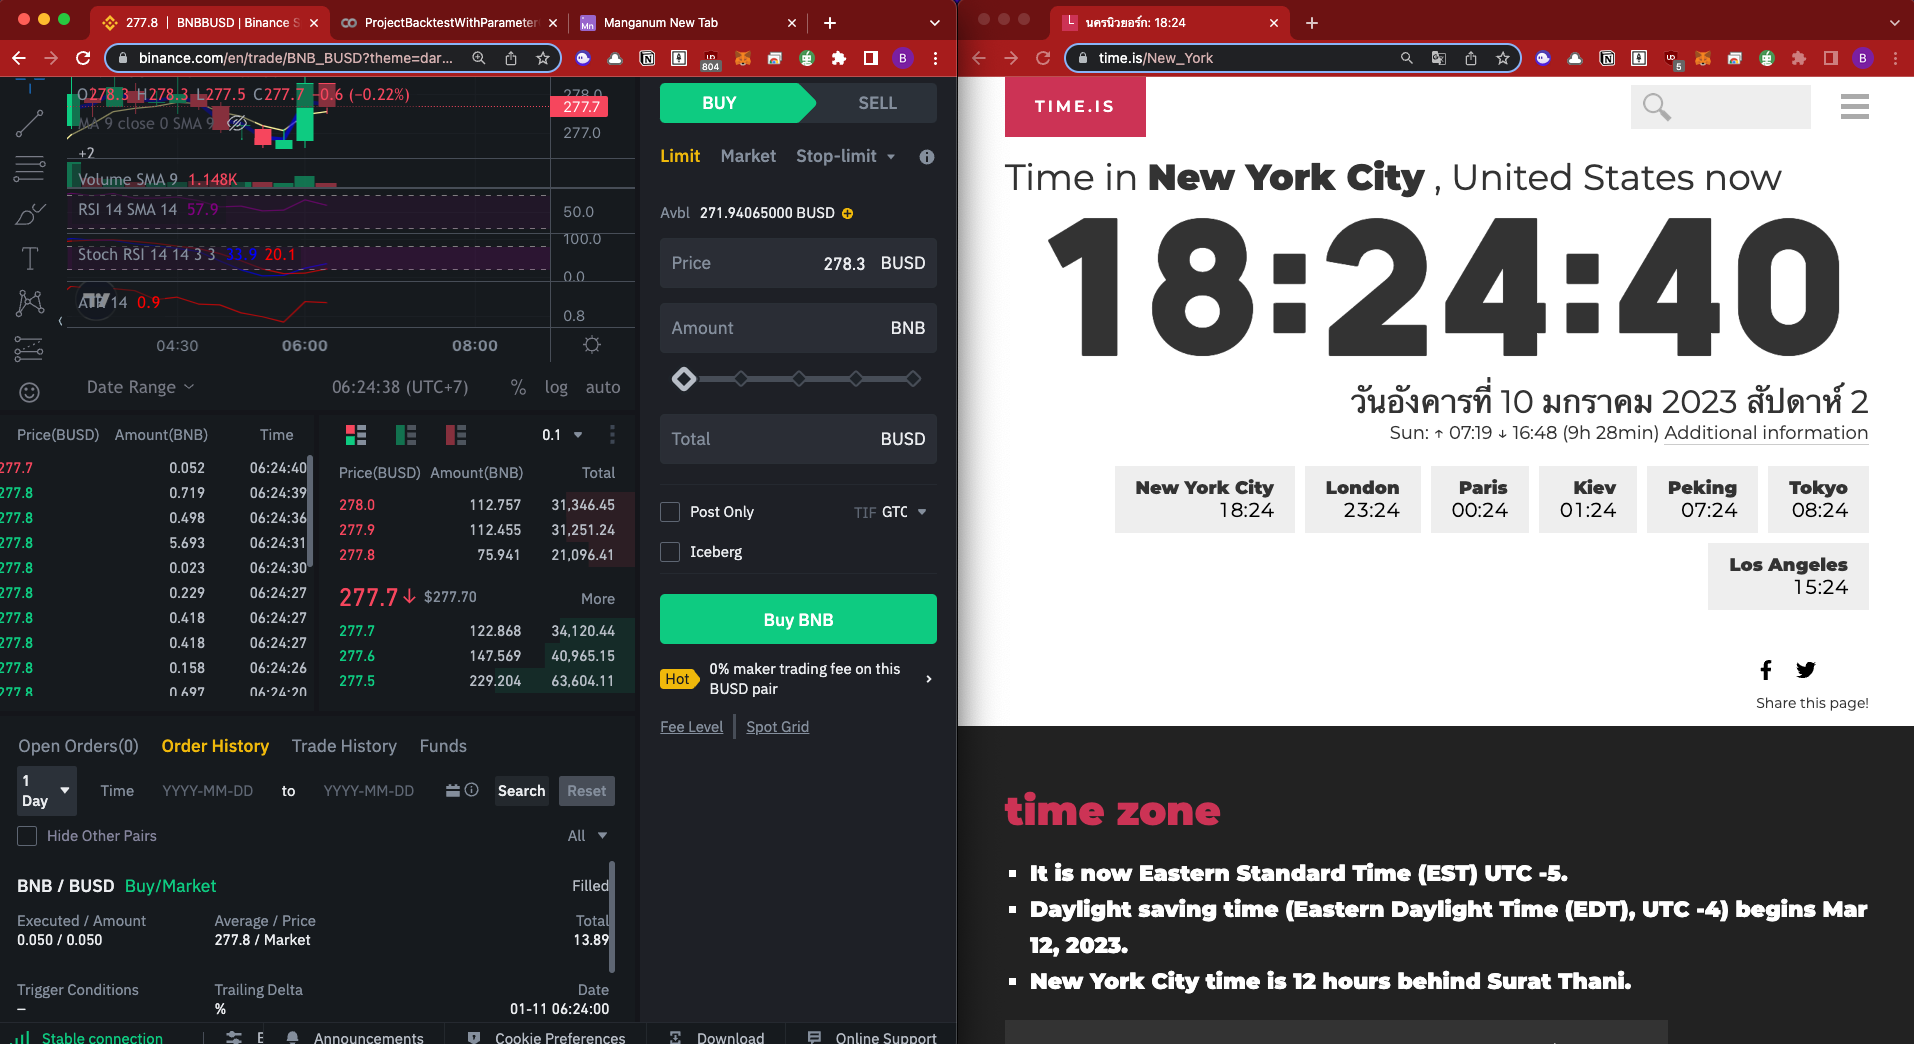

In [ ]:
log

[['buy',
  {'symbol': 'BNBBUSD',
   'orderId': 1531192999,
   'orderListId': -1,
   'clientOrderId': 'GYGWoAyRZ4yPUq6nHSOxJb',
   'price': '0.00000000',
   'origQty': '0.05000000',
   'executedQty': '0.05000000',
   'cummulativeQuoteQty': '13.89000000',
   'status': 'FILLED',
   'timeInForce': 'GTC',
   'type': 'MARKET',
   'side': 'BUY',
   'stopPrice': '0.00000000',
   'icebergQty': '0.00000000',
   'time': 1673393040149,
   'updateTime': 1673393040149,
   'isWorking': True,
   'workingTime': 1673393040149,
   'origQuoteOrderQty': '0.00000000',
   'selfTradePreventionMode': 'NONE'}]]